In [1]:
 import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Nos conectamos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Datos
net_tot = pd.read_csv("/content/drive/My Drive/Sakura/Global_CF.csv")
net_tot=net_tot[['Source','Target']]
net_tot.head()

,Source,Target
0,AATF,CDKN1A
1,AATF,MYCB
2,AATF,TP53
3,ABL1,BCL2
4,ABL1,BCL6


In [4]:
len(net_tot)

5419

In [5]:
#Transformamos la lista de interacciones en un grafo
Net = nx.from_pandas_edgelist(net_tot, 'Source', 'Target', create_using=nx.DiGraph())

In [6]:
print(nx.is_directed(Net))

True


In [7]:
#Observamos la información basica del grafo
print('Number of nodes', len(Net.nodes))
print('Number of edges', len(Net.edges))

Number of nodes 2149
Number of edges 5419


In [ ]:
nx.average_clustering(Net)

0.06510137569748915

In [8]:
G2 = Net.to_undirected()

In [9]:
components = nx.connected_components(G2)
largest_component = max(components, key=len)
NumCC=nx.number_connected_components(G2)

In [10]:
NumCC

25

In [11]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

[2100, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

In [12]:
Indegree_dict = dict(Net.in_degree(Net.nodes()))
nx.set_node_attributes(Net, Indegree_dict, 'degree')

In [13]:
import operator
sorted_Indegree = sorted(Indegree_dict.items(), key=operator.itemgetter(1), reverse=True)

In [16]:
for d in sorted_Indegree[:200]:
    print(d)

('CDKN1A', 81)
('CCND1', 60)
('MYCB', 46)
('PTGS2', 43)
('BCL2', 38)
('TP53', 31)
('MMP2', 28)
('MMP9', 28)
('CCND2', 23)
('PPARG', 23)
('ERBB2', 23)
('ERBB4', 22)
('JUN', 21)
('ESR1', 21)
('FOS', 19)
('IL10', 19)
('CCNA1', 19)
('ABCB11', 19)
('SERPINE1', 18)
('TGFB1', 16)
('PLAU', 16)
('CYP19A1', 16)
('FASLG', 15)
('CXCL8', 15)
('PTEN', 15)
('STAR', 15)
('KAG9259909.1', 14)
('TNF', 14)
('NFKB1', 14)
('KAG9266355.1', 14)
('MITF', 14)
('CCNB2', 14)
('HIF1A', 14)
('CDK4', 14)
('ABCG2', 13)
('IL1B', 13)
('BMP2', 13)
('PDX1', 13)
('SLC2A1', 13)
('CDKN2B', 13)
('CYP3A30', 13)
('MMP13', 13)
('THBD', 13)
('MET', 13)
('FOXP3', 13)
('BCL6', 12)
('PCNA', 12)
('DNMT1', 12)
('IHHB', 12)
('TNFRSF23', 12)
('ACTBA', 12)
('IGF2', 12)
('CCNE1', 12)
('CDK1', 11)
('CCL11', 11)
('CEBPA', 11)
('CFTR', 11)
('CYP17A1', 11)
('NF1', 11)
('CYP2G1', 11)
('SOX2', 11)
('TP73', 11)
('EPO', 11)
('ABCA1', 11)
('CD40', 11)
('VDRA', 11)
('ATF3', 10)
('GCK', 10)
('STAT3', 10)
('DMD', 10)
('KAG9280168.1', 10)
('PRL', 10)

In [ ]:
Outdegree_dict = dict(Net.out_degree(Net.nodes()))
nx.set_node_attributes(Net, Outdegree_dict, 'degree')
sorted_Outdegree = sorted(Outdegree_dict.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
for d in sorted_Outdegree[:15]:
    print(d)

('SP1', 282)
('RFX3', 188)
('FOXO1B', 187)
('KAG9259909.1', 157)
('BPTF', 131)
('JUN', 122)
('TP53', 103)
('SP3', 96)
('NFKB1', 80)
('ETS2', 79)
('STAT3', 79)
('ARNT', 76)
('CREB1', 73)
('ETV6', 70)
('MYCB', 63)


In [ ]:
M =  nx.adjacency_matrix(Net)
# Get the sum of each column (indegree) and convert to a 1D array
indegrees = M.sum(axis=0).flatten()  # Use flatten() instead of A1
# Get the sum of each row (outdegree) and convert to a 1D array
outdegrees = M.sum(axis=1).flatten()  # Use flatten() instead of A1
in_degrees = Net.in_degree()
out_degrees = Net.out_degree()

In [ ]:
indegrees=indegrees.astype(np.int64)
outdegrees=outdegrees.astype(np.int64)
indegree_distribution = np.bincount(indegrees)
outdegree_distribution = np.bincount(outdegrees)

In [ ]:
xdata = np.array(range(len(indegree_distribution)))
ydata = np.array(indegree_distribution)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]
dataset.head()

,xdata,ydata
1,1,926
2,2,373
3,3,210
4,4,119
5,5,83


In [ ]:
x=dataset[['xdata']].to_numpy(float)
y=dataset[['ydata']].to_numpy(float)
x.astype(float);
y.astype(float);

In [ ]:
dflog=np.log(dataset[['xdata','ydata']])
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

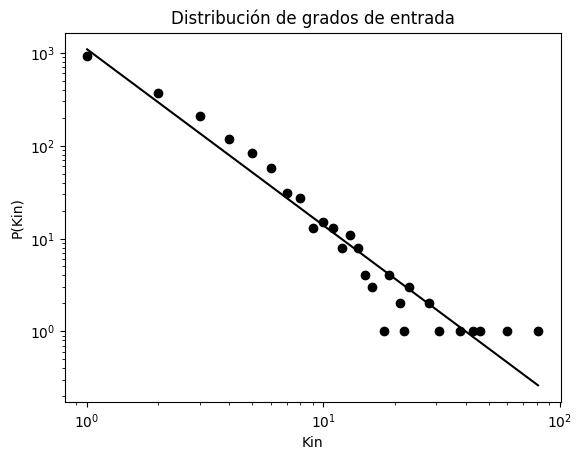

In [ ]:
logx = new_df.xdata
logy = new_df.ydata
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(x,y,'ko')
plt.ylabel('P(Kin)')
plt.xlabel('Kin')
plt.title('Distribución de grados de entrada')
plt.loglog(x,yfit(x),'k', label=r'$y=3995x^{-3.34}$')
#plt.loglog(x,yfit(x),'k')
#plt.legend()
plt.savefig('InputDegree.png',dpi=300)
plt.show()

In [ ]:
xdata = np.array(range(len(outdegree_distribution)))
ydata = np.array(outdegree_distribution)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]

In [ ]:
x=dataset[['xdata']].to_numpy(float)
y=dataset[['ydata']].to_numpy(float)
x.astype(float);
y.astype(float);

In [ ]:
dflog=np.log(dataset[['xdata','ydata']])
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

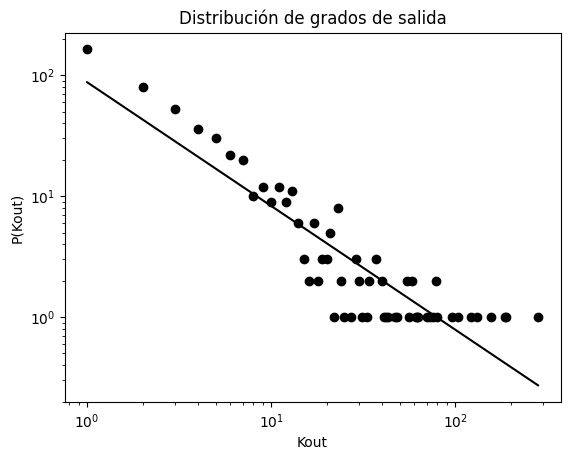

In [ ]:
logx = new_df.xdata
logy = new_df.ydata
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(x,y,'ko')
plt.ylabel('P(Kout)')
plt.xlabel('Kout')
plt.title('Distribución de grados de salida')
#plt.loglog(x,yfit(x),'k',label=r'$y=594.82x^{-1.47}$')
plt.loglog(x,yfit(x),'k')
#plt.legend()
plt.savefig('OutputDegree.png',dpi=300)
plt.show()

In [ ]:
from scipy import optimize
NetDia = nx.degree_histogram(Net)
xdata = np.array(range(len(NetDia)))
ydata = np.array(NetDia)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
np.polyfit(x,y,1)
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)
yerr = 0.2 * y
logx = np.log10(x)
logy = np.log10(y)
logyerr = yerr / y
np.polyfit(logx,logy,1)
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

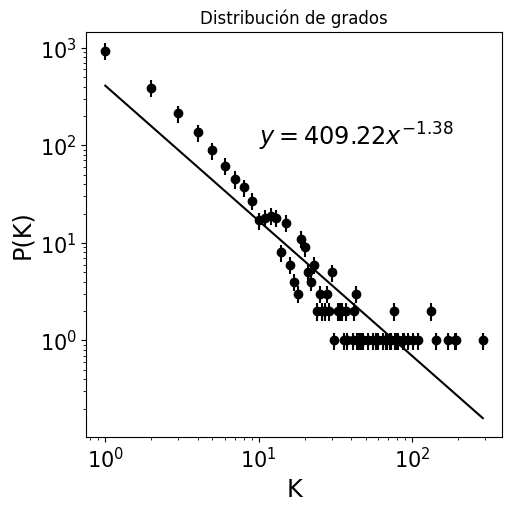

In [ ]:
import matplotlib.pyplot as plt
index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5,5))

ax.loglog(x, powerlaw(x, amp, index), color='k')
ax.errorbar(x, y, yerr=yerr, fmt='ko')  # Data
ax.text(10, 100, '$y = %5.2f x^{%5.2f}$' % (amp,index), fontsize='xx-large')
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
ax.set_xlabel('K', fontsize='xx-large')
ax.set_ylabel('P(K)', fontsize='xx-large')
ax.set_title('Distribución de grados')
#plt.savefig('Modeloarticulo.png', dpi=300)
plt.show()


In [ ]:
n = 2149  # nodes
m = 5419  # edges
seed = 20160  # seed random number generators for reproducibility

RanNet = nx.gnm_random_graph(n, m, seed=seed)
print('Number of nodes', len(RanNet.nodes))
print('Number of edges', len(RanNet.edges))

Number of nodes 2149
Number of edges 5419


In [ ]:
from scipy import optimize
NetDia = nx.degree_histogram(RanNet)
xdata = np.array(range(len(NetDia)))
ydata = np.array(NetDia)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
np.polyfit(x,y,1)
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)
yerr = 0.2 * y
logx = np.log10(x)
logy = np.log10(y)
logyerr = yerr / y
np.polyfit(logx,logy,1)
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

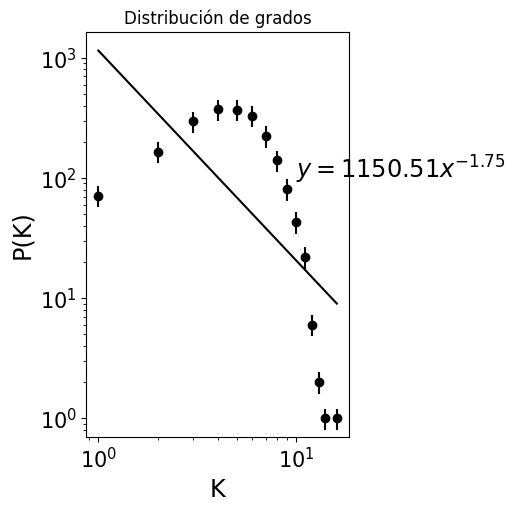

In [ ]:
index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5,5))

ax.loglog(x, powerlaw(x, amp, index), color='k')
ax.errorbar(x, y, yerr=yerr, fmt='ko')  # Data
ax.text(10, 100, '$y = %5.2f x^{%5.2f}$' % (amp,index), fontsize='xx-large')
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
ax.set_xlabel('K', fontsize='xx-large')
ax.set_ylabel('P(K)', fontsize='xx-large')
ax.set_title('Distribución de grados')
#plt.savefig('Modeloarticulo.png', dpi=300)
plt.show()
